In [1]:
# to make colored print message
!pip install colorama

In [2]:
# 1. Setup - Import Packages
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from colorama import Fore, Style
from tensorflow.keras.models import load_model

In [3]:
#2. Load Model
model = load_model(os.path.join('models','crack_classify.h5'))

In [4]:
# Function to Predict Crack or Not
def predict_crack(image_path):
    # Read image
    img = cv2.imread(image_path)
    
    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Display original image
    axes[0].set_title('Original Image', fontsize=10)
    axes[0].imshow(img)

    # Resize image
    resize = tf.image.resize(img, (256, 256))

    # Display resized image
    axes[1].set_title('Scaled Image', fontsize=10)
    axes[1].imshow(resize.numpy().astype(int))
    plt.show()
    
    # Make prediction
    y_pred = model.predict(np.expand_dims(resize / 255, 0))
    
    # Display prediction result
    if y_pred > 0.5:
        print(f'{Fore.RED}{y_pred}{Style.RESET_ALL}')
        print(f'{Fore.RED}Predicted class is Crack{Style.RESET_ALL}')
    else:
        print(f'{Fore.GREEN}{y_pred}{Style.RESET_ALL}')
        print(f'{Fore.GREEN}Predicted class is Not Crack{Style.RESET_ALL}')

In [5]:
#3. Testing the deployed model
folder_path = 'images'
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

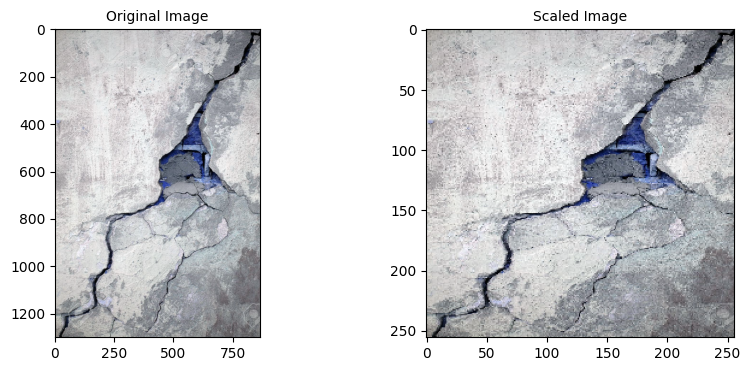

[[0.9999218]]
Predicted class is Crack


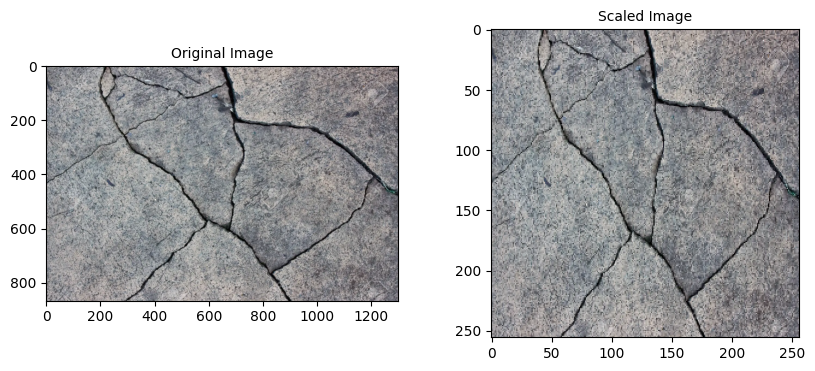

[[0.9999957]]
Predicted class is Crack


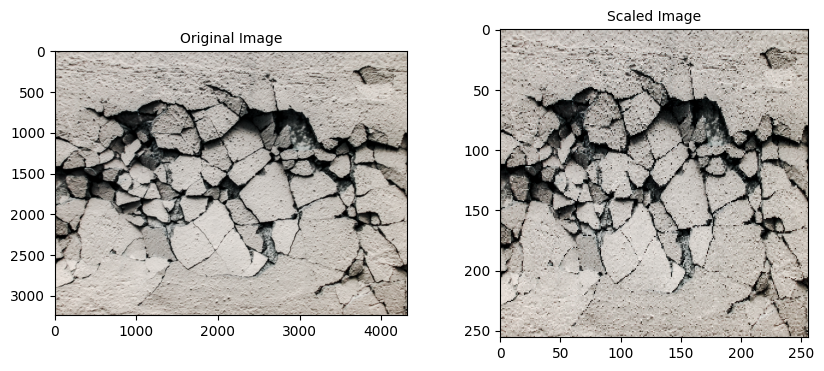

[[1.]]
Predicted class is Crack


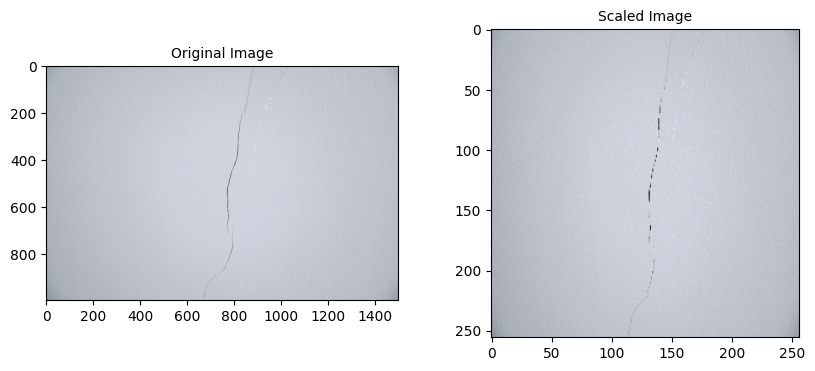

[[0.00025096]]
Predicted class is Not Crack


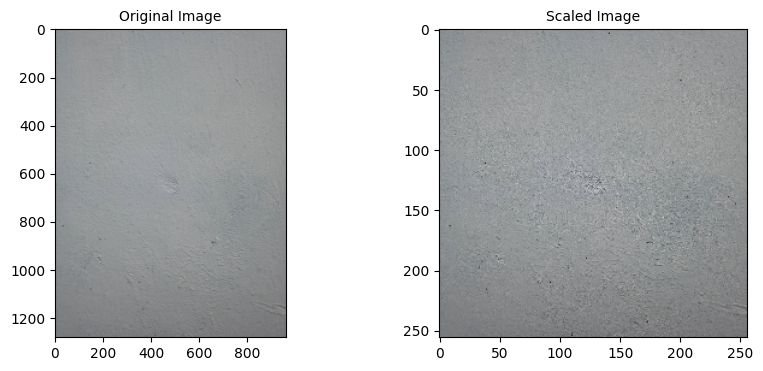

[[0.00170084]]
Predicted class is Not Crack


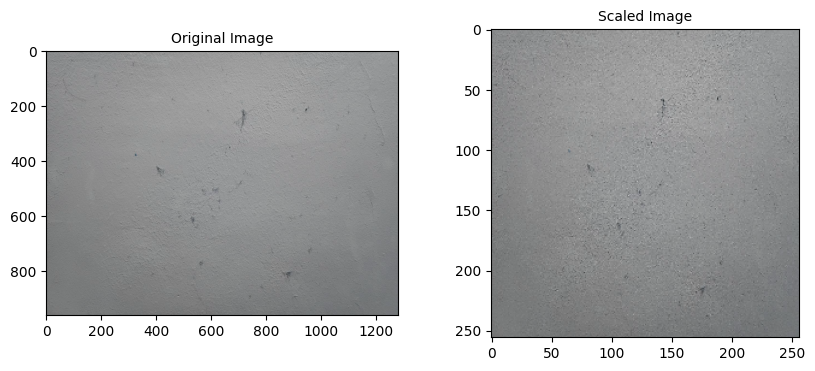

[[0.00251434]]
Predicted class is Not Crack


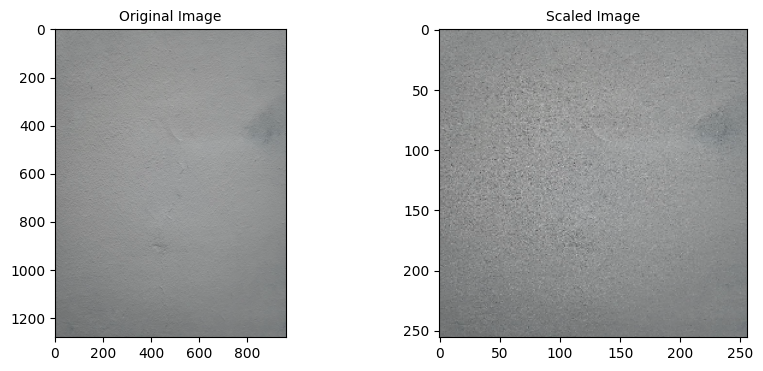

[[0.00197648]]
Predicted class is Not Crack


In [6]:
# Predict for each image file
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    predict_crack(image_path)